<a href="https://colab.research.google.com/github/belllaw/AiCollabo/blob/modeling/CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4


Found existing installation: keras 2.9.0
Uninstalling keras-2.9.0:
  Successfully uninstalled keras-2.9.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Successfully uninstalled tensorflow-2.9.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.5 MB/s eta 0:00:00
    

In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
import tensorflow
import keras
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, GlobalMaxPooling1D
from keras.layers import BatchNormalization, ReLU
import tensorflow.keras.optimizers

In [ ]:
train = arff.loadarff("FordA_TRAIN.arff")
test = arff.loadarff("FordA_TEST.arff")

data_train = pd.DataFrame(train[0])
data_test = pd.DataFrame(test[0])

data_train['target'].values
data_train.iloc[:,:-1]

X = data_train.iloc[:,:-1]
Y = data_train.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split
target = data_train['target']
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, 
                                                    test_size = 0.2,
                                                    random_state = 500,
                                                   stratify = Y)


In [ ]:
x_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]


In [ ]:
corr_df = X.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

pd.options.display.max_rows = 60
pd.options.display.max_columns = 20


In [ ]:
y_train[y_train == b'-1'] = 0
y_valid[y_valid == b'-1'] = 0
y_test[y_test == b'-1'] = 0

y_train[y_train == b'1'] = 1
y_valid[y_valid == b'1'] = 1
y_test[y_test == b'1'] = 1

<ipython-input-119-718de30015ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[y_test == b'-1'] = 0
<ipython-input-119-718de30015ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[y_test == b'1'] = 1


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)

x_train = std.transform(x_train)
x_valid = std.transform(x_valid)

x_train.shape
x_train

std = StandardScaler()
std.fit(x_test)

x_test = std.transform(x_test)

In [ ]:
x_train_c = np.expand_dims(x_train, -1)
x_valid_c = np.expand_dims(x_valid, -1)
x_test_c = np.expand_dims(x_test, -1)


In [ ]:
y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV, train_test_split

 
model = Sequential()

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience = 50, verbose = 1)
model_checkpoint = ModelCheckpoint(filepath='./{epoch}-{val_loss:.2f}-{val_sparse_categorical_accuracy:.2f}.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lronplateau = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 20, min_lr = 0.00001)
history = model.fit(x_train_c, y_train,
                    batch_size = 64,
                    epochs = 300,
                    callbacks=[early_stopping, model_checkpoint],
                    validation_data = (x_valid_c, y_valid), verbose = 1)



Epoch 1/300
45/45 [==============================] - ETA: 0s - loss: 0.6484 - sparse_categorical_accuracy: 0.6562
Epoch 1: val_loss improved from inf to 0.69144, saving model to ./1-0.69-0.57.h5
45/45 [==============================] - 13s 266ms/step - loss: 0.6484 - sparse_categorical_accuracy: 0.6562 - val_loss: 0.6914 - val_sparse_categorical_accuracy: 0.5714
Epoch 2/300
45/45 [==============================] - ETA: 0s - loss: 0.4659 - sparse_categorical_accuracy: 0.7698
Epoch 2: val_loss improved from 0.69144 to 0.68792, saving model to ./2-0.69-0.57.h5
45/45 [==============================] - 12s 256ms/step - loss: 0.4659 - sparse_categorical_accuracy: 0.7698 - val_loss: 0.6879 - val_sparse_categorical_accuracy: 0.5728
Epoch 3/300
45/45 [==============================] - ETA: 0s - loss: 0.4442 - sparse_categorical_accuracy: 0.7757
Epoch 3: val_loss improved from 0.68792 to 0.68423, saving model to ./3-0.68-0.57.h5
45/45 [==============================] - 11s 250ms/step - loss: 0.4

TypeError: ignored

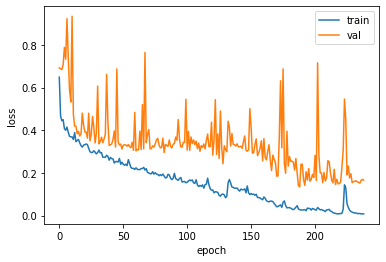

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

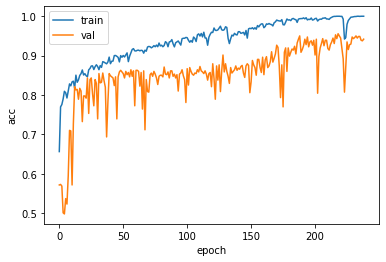

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(x_valid_c, y_valid)

23/23 [==============================] - 1s 34ms/step - loss: 0.1654 - sparse_categorical_accuracy: 0.9417


[0.16540731489658356, 0.9417475461959839]

In [ ]:
model.evaluate(x_test_c, y_test)

42/42 [==============================] - 1s 28ms/step - loss: 0.2081 - sparse_categorical_accuracy: 0.9364


[0.20810140669345856, 0.9363636374473572]

In [ ]:
scores = model.evaluate(x_test_c, y_test)

print('Test Acc', scores[1])
print('Test Loss', scores[0])
print(model.metrics_names[1], scores[1]*100)

42/42 [==============================] - 1s 26ms/step - loss: 0.2081 - sparse_categorical_accuracy: 0.9364
Test Acc 0.9363636374473572
Test Loss 0.20810140669345856
sparse_categorical_accuracy 93.63636374473572


42/42 [==============================] - 1s 27ms/step


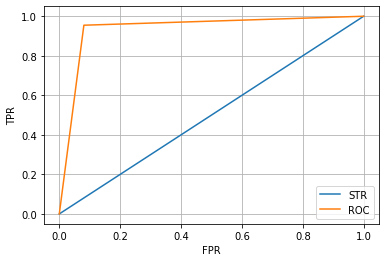

In [ ]:
from sklearn.metrics import roc_curve, auc

predict_prob = model.predict(x_test_c)
predict_classes = np.argmax(predict_prob, axis = 1)

fprs, tprs, thredshold = roc_curve(y_test, predict_classes)

precisions, recalls, thredsholds = roc_curve(y_test, predict_classes)
plt.plot([0,1], [0,1], label = 'STR')
plt.plot(fprs, tprs, label='ROC')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

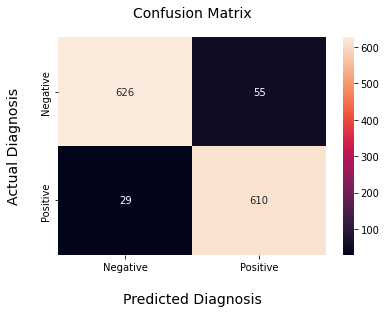

In [ ]:
from pandas.core.frame import itertools
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, predict_classes)
ax = sns.heatmap(cf_matrix, annot=True, fmt='d',)
ax.set_xlabel("Predicted Diagnosis", fontsize = 14, labelpad = 20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize = 14, labelpad = 20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix", fontsize = 14, pad = 20)

In [ ]:
print(cf_matrix)

[[626  55]
 [ 29 610]]


In [ ]:
#그 뭐더라 이게 뭐지
